In [3]:
# Code for decoupling ocean acidification and carbonate saturation state
# Results analysis and plot
# Author: Shihan Li | shihan@tamu.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# plot the results
mpl.rcParams['pdf.fonttype'] = 42
# Set font and set mathtext font the same with text font
mpl.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
mpl.rcParams['mathtext.default'] = 'regular'
# Set tick size globally
# Set tick size globally
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['legend.fontsize'] = 14
plt.close("all")


In [3]:
# Fig. 1, Arg

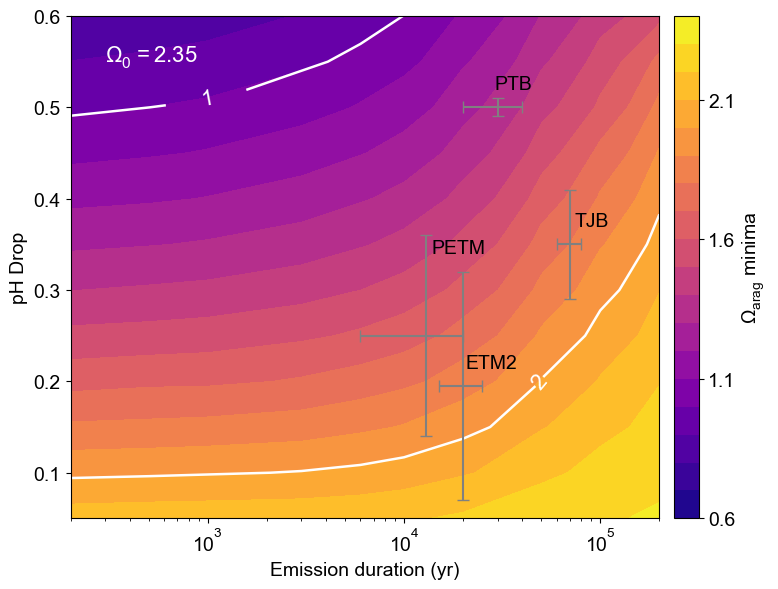

In [21]:
# Arg
from matplotlib.cm import ScalarMappable
df = pd.read_csv('petm_results.csv')
df = df[df['interval_length'] != 500000]

# Pivot + prepare data
Z = df.pivot(index='ph_drop', columns='interval_length', values='final_omegaarg')
Z = Z.astype(float)
X, Y = np.meshgrid(Z.columns.values, Z.index.values)
Z = Z.values

# Reference value
ref = 5.12

# Contour levels
plot_levels = np.arange(0.6, np.ceil(Z.max()) - 0.5, 0.1)
cbar_levels = np.arange(0.6, np.ceil(Z.max()) - 0.5, 0.5)

# Plot contour
fig, ax = plt.subplots(figsize=(8, 6))
cp = ax.contourf(X, Y, Z, levels=plot_levels, cmap='plasma')

# First colorbar (Ωcalcite)
cbar1 = fig.colorbar(cp, ax=ax, pad=0.02, ticks=cbar_levels)
cbar1.set_label(r'$\Omega_{arag}$ minima', fontsize=14)

# Second colorbar (percentage) using *same colormap and normalization*
sm = ScalarMappable(cmap='plasma', norm=cp.norm)
sm.set_array([])

# # Add second colorbar
# cbar2 = fig.colorbar(sm, ax=ax, pad=0.12)
# cbar2.set_label(r'% of $\Omega_{calcite}$ reference (5.12)', fontsize=14)

# Match ticks, but convert to %
# percent_ticks = [int(val / ref * 100) for val in cbar_levels]
# cbar2.set_ticks(cbar_levels)
# cbar2.set_ticklabels(percent_ticks)

# Add contour lines at levels 2, 3, and 4

cs = ax.contour(X, Y, Z, levels=[1,  2], colors='white', linewidths=1.8, linestyles='solid')

ax.clabel(cs, fmt='%.0f', inline_spacing=1, colors='white', fontsize=16, use_clabeltext=True)



# Add obs
obs_points = [
    (20000, 0.195),   # midpoint of 15000–25000 and 0.07–0.32
    (13000, 0.25),    # midpoint of 6000–20000 and 0.18–0.56
    (70000, 0.29),    # point
    (15000, 0.5)      # midpoint of ~10000–20000
]

# Central points
x_obs = [20000, 13000, 70000, 30000]        # Emission durations
y_obs = [0.195, 0.25, 0.35, 0.5]            # pH drop

# Uncertainties
x_err = [5000, 7000, 10000, 10000]           # Emission duration uncertainty (yr)
y_err = [0.125, 0.11, 0.06, 0.01]           # pH drop uncertainty

# Plot with error bars
ax.errorbar(x_obs, y_obs,
            xerr=x_err, yerr=y_err,
            fmt='o', color='black', ecolor='gray', ms = 0,
            elinewidth=1.5, capsize=4, label='Literature constraints')

# Optional: add labels above points
labels = ['ETM2', 'PETM', 'TJB', 'PTB']
y_obs[1] = 0.32
patch = [8000, 6000, 20000, 6000]
for i, (x, y, z) in enumerate(zip(x_obs, y_obs,patch)):
    ax.text(x+z, y + 0.02, labels[i], color='black', fontsize=14, ha='center')

# add text
ax.text(300, 0.55, r'$\Omega_0 = 2.35$', fontsize=16, color='white')

# Axis formatting
ax.set_xscale('log')
ax.set_xlabel('Emission duration (yr)', fontsize=14)
ax.set_ylabel('pH Drop', fontsize=14)
plt.tight_layout()
plt.savefig('petm_arg_v3.png', dpi=300, bbox_inches='tight')
plt.show()

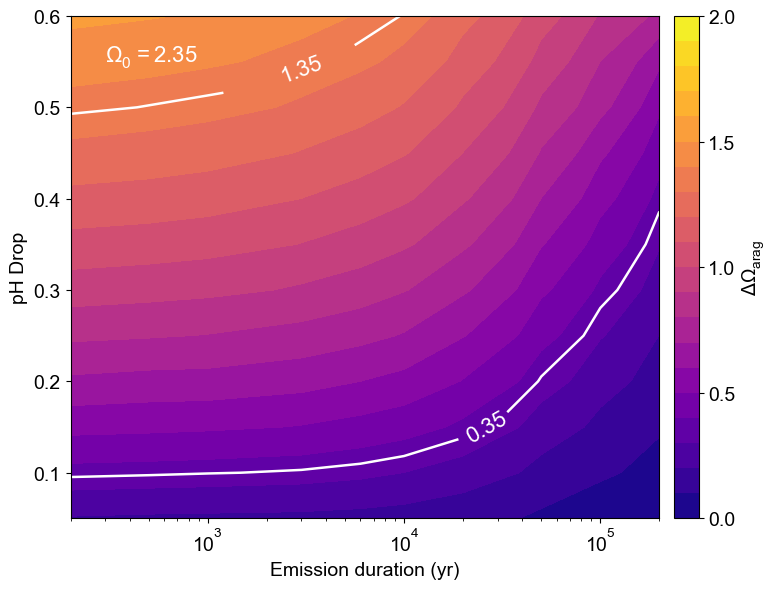

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

# === Load data ===
df = pd.read_csv('petm_results.csv')
df = df[df['interval_length'] != 500000]

# === Compute Omega drop ===
df["omega_drop"] = df["init_omegaarg"] - df["final_omegaarg"]

# === Pivot for contour plot ===
Z = df.pivot(index='ph_drop', columns='interval_length', values='omega_drop')
Z = Z.astype(float)
X, Y = np.meshgrid(Z.columns.values, Z.index.values)
Z = Z.values

# === Reference value (optional) ===
ref = 5.12

# === Define contour levels ===
plot_levels = np.arange(np.floor(Z.min()), np.ceil(Z.max()) + 0.05, 0.1)
cbar_levels = np.arange(np.floor(Z.min()), np.ceil(Z.max()) + 0.05, 0.5)

# === Plot ===
fig, ax = plt.subplots(figsize=(8, 6))
cp = ax.contourf(X, Y, Z, levels=plot_levels, cmap='plasma')

# Colorbar
cbar1 = fig.colorbar(cp, ax=ax, pad=0.02, ticks=cbar_levels)
cbar1.set_label(r'$\Delta \Omega_{arag}$', fontsize=14)

# Add contour lines at key drops
cs = ax.contour(X, Y, Z, levels=[0.35, 1.35], colors='white', linewidths=1.8, linestyles='solid')
ax.clabel(cs, fmt='%.2f', inline_spacing=1, colors='white', fontsize=16, use_clabeltext=True)

# === Observations ===
x_obs = [20000, 13000, 70000, 30000]
y_obs = [0.195, 0.25, 0.35, 0.5]
x_err = [5000, 7000, 10000, 10000]
y_err = [0.125, 0.11, 0.06, 0.01]

# (Uncomment below to plot error bars and labels if needed)
# ax.errorbar(x_obs, y_obs,
#             xerr=x_err, yerr=y_err,
#             fmt='o', color='black', ecolor='gray', ms=0,
#             elinewidth=1.5, capsize=4, label='Literature constraints')
# labels = ['ETM2', 'PETM', 'TJB', 'PTB']
# y_obs[1] = 0.32
# patch = [8000, 6000, 20000, 6000]
# for i, (x, y, z) in enumerate(zip(x_obs, y_obs, patch)):
#     ax.text(x+z, y + 0.02, labels[i], color='black', fontsize=14, ha='center')

# Text annotation
ax.text(300, 0.55, r'$\Omega_0 = 2.35$', fontsize=16, color='white')

# Axis formatting
ax.set_xscale('log')
ax.set_xlabel('Emission duration (yr)', fontsize=14)
ax.set_ylabel('pH Drop', fontsize=14)
plt.tight_layout()
plt.savefig('petm_argdrop_contour.png', dpi=300, bbox_inches='tight')
plt.show()

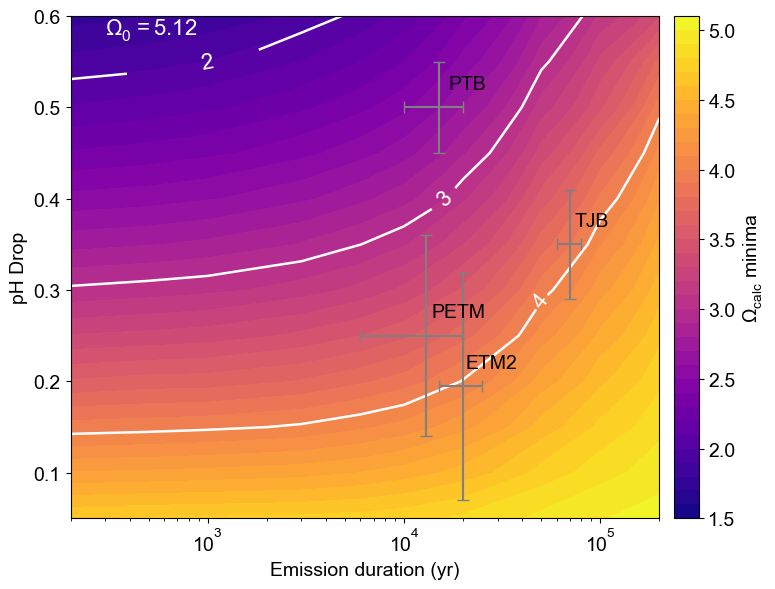

In [4]:
# Calcite

from matplotlib.cm import ScalarMappable

# Pivot + prepare data
Z = df.pivot(index='ph_drop', columns='interval_length', values='final_omegaclc')
Z = Z.astype(float)
X, Y = np.meshgrid(Z.columns.values, Z.index.values)
Z = Z.values

# Reference value
ref = 5.12

# Contour levels
plot_levels = np.arange(1.5, np.ceil(Z.max()) - 0.8, 0.1)
cbar_levels = np.arange(1.5, np.ceil(Z.max()) - 0.8, 0.5)

# Plot contour
fig, ax = plt.subplots(figsize=(8, 6))
cp = ax.contourf(X, Y, Z, levels=plot_levels, cmap='plasma')

# First colorbar (Ωcalcite)
cbar1 = fig.colorbar(cp, ax=ax, pad=0.02, ticks=cbar_levels)
cbar1.set_label(r'$\Omega_{calc}$ minima', fontsize=14)

# Second colorbar (percentage) using *same colormap and normalization*
sm = ScalarMappable(cmap='plasma', norm=cp.norm)
sm.set_array([])

# # Add second colorbar
# cbar2 = fig.colorbar(sm, ax=ax, pad=0.12)
# cbar2.set_label(r'% of $\Omega_{calcite}$ reference (5.12)', fontsize=14)

# Match ticks, but convert to %
# percent_ticks = [int(val / ref * 100) for val in cbar_levels]
# cbar2.set_ticks(cbar_levels)
# cbar2.set_ticklabels(percent_ticks)

# Add contour lines at levels 2, 3, and 4

cs = ax.contour(X, Y, Z, levels=[2, 3, 4], colors='white', linewidths=1.8, linestyles='solid')

ax.clabel(cs, fmt='%.0f', colors='white', fontsize=16,  inline=True, use_clabeltext=True)



# Add obs
obs_points = [
    (20000, 0.195),   # midpoint of 15000–25000 and 0.07–0.32
    (13000, 0.37),    # midpoint of 6000–20000 and 0.18–0.56
    (70000, 0.29),    # point
    (15000, 0.5)      # midpoint of ~10000–20000
]

# Central points
x_obs = [20000, 13000, 70000, 15000]        # Emission durations
y_obs = [0.195, 0.25, 0.35, 0.5]            # pH drop

# Uncertainties
x_err = [5000, 7000, 10000, 5000]           # Emission duration uncertainty (yr)
y_err = [0.125, 0.11, 0.06, 0.05]           # pH drop uncertainty


# Plot with error bars
ax.errorbar(x_obs, y_obs,
            xerr=x_err, yerr=y_err,
            fmt='o', color='black', ecolor='gray', ms = 0,
            elinewidth=1.5, capsize=4, label='Literature constraints')

# Optional: add labels above points
labels = ['ETM2', 'PETM', 'TJB', 'PTB']
patch = [8000, 6000, 20000, 6000]
for i, (x, y, z) in enumerate(zip(x_obs, y_obs, patch)):
    ax.text(x+z, y + 0.02, labels[i], color='black', fontsize=14, ha='center')

# add text
ax.text(300, 0.58, r'$\Omega_0 = 5.12$', fontsize=16, color='white')


# Axis formatting
ax.set_xscale('log')
ax.set_xlabel('Emission duration (yr)', fontsize=14)
ax.set_ylabel('pH Drop', fontsize=14)
plt.tight_layout()
plt.savefig('petm_calc.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# plot the corresponding emission rate

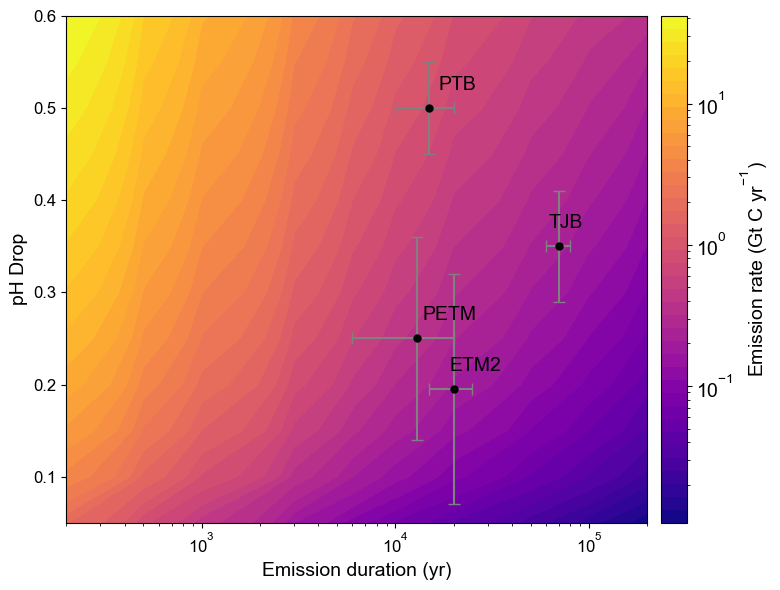

In [35]:
# Arg
from matplotlib.colors import LogNorm

df = pd.read_csv('petm_results.csv')
df['emi_rate'] = df['emi']/df['interval_length']
df = df[df['interval_length'] != 500000]

# === Pivot for emi_rate instead of final_omegaarg ===
Z = df.pivot(index='ph_drop', columns='interval_length', values='emi_rate')
Z = Z.astype(float)
X, Y = np.meshgrid(Z.columns.values, Z.index.values)
Z = Z.values

# === Contour Levels ===
plot_levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), 40)
cbar_levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), 6)

# === Create Figure ===
fig, ax = plt.subplots(figsize=(8, 6))
cp = ax.contourf(X, Y, Z, levels=plot_levels, cmap='plasma',
                 norm=LogNorm(vmin=Z.min(), vmax=Z.max()))

# === Log-scaled Colorbar ===
cbar1 = fig.colorbar(cp, ax=ax, pad=0.02, ticks=cbar_levels)
cbar1.set_label(r'Emission rate (Gt C yr$^{-1}$)', fontsize=14)
cbar1.ax.set_yscale('log')
# === Observational Points ===
x_obs = [20000, 13000, 70000, 15000]   # Emission durations (yr)
y_obs = [0.195, 0.25, 0.35, 0.5]       # pH drop
x_err = [5000, 7000, 10000, 5000]      # X uncertainties
y_err = [0.125, 0.11, 0.06, 0.05]      # Y uncertainties

# Add error bars + points
ax.errorbar(x_obs, y_obs,
            xerr=x_err, yerr=y_err,
            fmt='o', color='black', ecolor='gray', ms=5,
            elinewidth=1.5, capsize=4, label='Literature constraints')

# Labels for obs points
labels = ['ETM2', 'PETM', 'TJB', 'PTB']
for i, (x, y) in enumerate(zip(x_obs, y_obs)):
    ax.text(x + 6000, y + 0.02, labels[i], color='black', fontsize=14, ha='center')

# === Axis Formatting ===
ax.set_xscale('log')
ax.set_xlabel('Emission duration (yr)', fontsize=14)
ax.set_ylabel('pH Drop', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# === Save & Show ===
plt.tight_layout()
plt.savefig('petm_emi_rate.png', dpi=300, bbox_inches='tight')
plt.show()

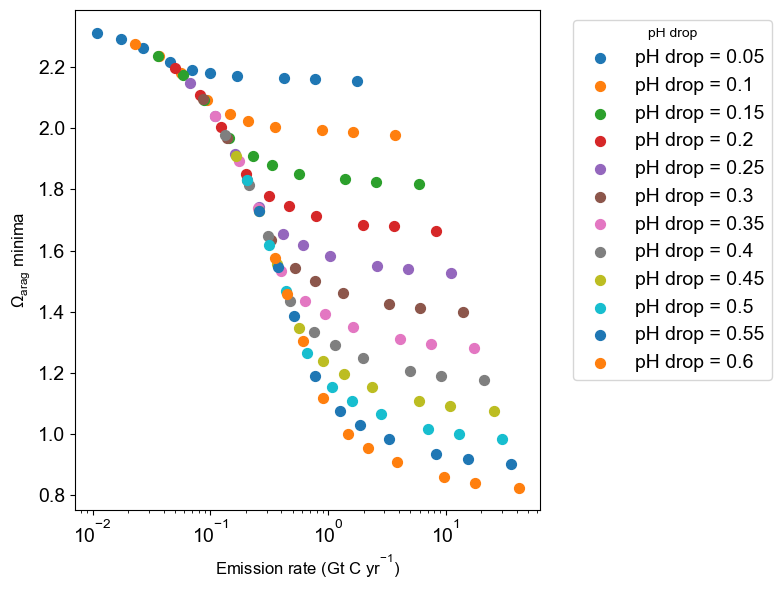

In [36]:
# Fig. S2, Compare saturation drop and emi rate
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# === Load data ===
df = pd.read_csv("petm_results.csv")

# === Create emi_rate column ===
df["emi_rate"] = df["emi"] / df["interval_length"]

plt.figure(figsize=(8, 6))

# Scatter plot for each pH drop group
for ph in sorted(df["ph_drop"].unique()):
    subset = df[df["ph_drop"] == ph]
    plt.scatter(subset["emi_rate"], subset["final_omegaarg"],
                label=f"pH drop = {ph}", s=50)
    

# Log scale on x-axis
plt.xscale("log")

# Labels and title
plt.xlabel("Emission rate (Gt C yr$^{-1}$)", fontsize=12)
plt.ylabel(r"$\Omega_{arag}$ minima", fontsize=12)
# plt.title(r"Final $\Omega_{aragonite}$ vs Emission Rate (Colored by pH Drop)", fontsize=14)

# Legend formatting
plt.legend(title="pH drop", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
# Fig. 2 sens test

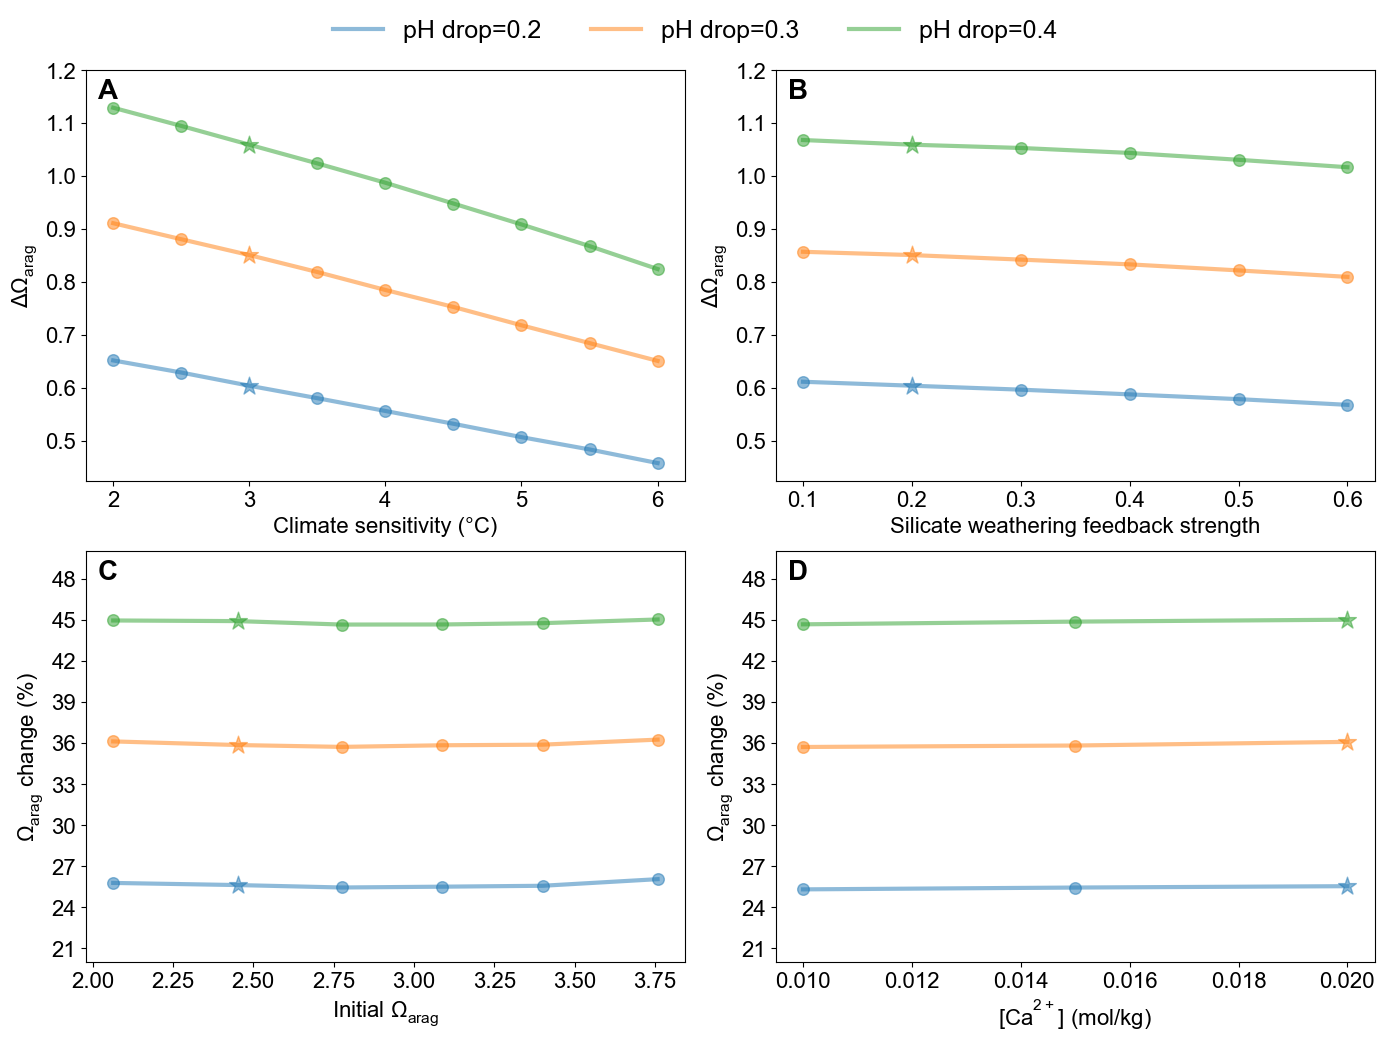

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# === Load datasets ===
df_sclim = pd.read_csv("sens_sclim_results.csv")
df_sclim['init_omegaarg'] = 2.35
df_nsi = pd.read_csv("sens_nsi_results.csv")
df_nsi['init_omegaarg'] = 2.35
df_rrain = pd.read_csv("sens_rrain_results.csv")
df_camg = pd.read_csv("sens_camg_results.csv")

# === Custom color theme ===
custom_colors = {
    0.2: '#1f77b4',  # 0.2
    0.3: '#ff7f0e',  # 0.3
    0.4: '#2ca02c'   # 0.4
}

# === Plot styling ===
alpha = 0.5
dot_size = 70
star_size = 180
line_width = 3
font_size = 16

# === Create figure ===
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
subplot_labels = ['A', 'B', 'C', 'D']

# === (a) Climate sensitivity ΔΩ ===
for ph in sorted(df_sclim["ph_drop"].unique()):
    subset = df_sclim[df_sclim["ph_drop"] == ph]
    color = custom_colors.get(ph, 'gray')
    idx_star = (subset["sclim"] - 3).abs().idxmin()

    y_delta = subset["init_omegaarg"] - subset["final_omegaarg"]

    axes[0].plot(subset["sclim"], y_delta,
                 color=color, linewidth=line_width, alpha=alpha, label=f"pH drop={ph}")
    for i, row in subset.iterrows():
        if i != idx_star:
            axes[0].scatter(row["sclim"],
                            row["init_omegaarg"] - row["final_omegaarg"],
                            s=dot_size, color=color, alpha=alpha)
    row = subset.loc[idx_star]
    axes[0].scatter(row["sclim"],
                    row["init_omegaarg"] - row["final_omegaarg"],
                    marker='*', s=star_size, color=color, alpha=alpha, zorder=5)

axes[0].set_xlabel("Climate sensitivity (°C)", fontsize=font_size)
axes[0].set_ylabel(r"$\Delta \Omega_{arag}$", fontsize=font_size)
axes[0].tick_params(axis='both', labelsize=font_size)
axes[0].text(0.02, 0.93, subplot_labels[0], transform=axes[0].transAxes,
             fontsize=font_size+4, fontweight='bold')

# === Legend (global) ===
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='upper center', fontsize=font_size+2, ncol=3,
           frameon=False, bbox_to_anchor=(0.5, 1.05))

# === (b) NSI ΔΩ ===
for ph in sorted(df_nsi["ph_drop"].unique()):
    subset = df_nsi[df_nsi["ph_drop"] == ph]
    color = custom_colors.get(ph, 'gray')
    idx_star = (subset["nsi"] - 0.2).abs().idxmin()

    y_delta = subset["init_omegaarg"] - subset["final_omegaarg"]

    axes[1].plot(subset["nsi"], y_delta,
                 color=color, linewidth=line_width, alpha=alpha)
    for i, row in subset.iterrows():
        if i != idx_star:
            axes[1].scatter(row["nsi"],
                            row["init_omegaarg"] - row["final_omegaarg"],
                            s=dot_size, color=color, alpha=alpha)
    row = subset.loc[idx_star]
    axes[1].scatter(row["nsi"],
                    row["init_omegaarg"] - row["final_omegaarg"],
                    marker='*', s=star_size, color=color, alpha=alpha, zorder=5)

axes[1].set_xlabel("Silicate weathering feedback strength", fontsize=font_size)
axes[1].set_ylabel(r"$\Delta \Omega_{arag}$", fontsize=font_size)
axes[1].tick_params(axis='both', labelsize=font_size)
axes[1].text(0.02, 0.93, subplot_labels[1], transform=axes[1].transAxes,
             fontsize=font_size+4, fontweight='bold')

# === (c) Initial Omegaarg (percent change) ===
for ph in sorted(df_rrain["ph_drop"].unique()):
    subset = df_rrain[df_rrain["ph_drop"] == ph]
    color = custom_colors.get(ph, 'gray')
    idx_star = (subset["rrain"] - 6.7).abs().idxmin()
    x = subset["init_omegaarg"]
    y = 100 - subset["final_omegaarg"] / subset["init_omegaarg"] * 100
    axes[2].plot(x, y, color=color, linewidth=line_width, alpha=alpha)
    for i, row in subset.iterrows():
        if i != idx_star:
            y_val = 100 - row["final_omegaarg"] / row["init_omegaarg"] * 100
            axes[2].scatter(row["init_omegaarg"], y_val,
                            s=dot_size, color=color, alpha=alpha)
    row = subset.loc[idx_star]
    y_star = 100 - row["final_omegaarg"] / row["init_omegaarg"] * 100
    axes[2].scatter(row["init_omegaarg"], y_star,
                    marker='*', s=star_size, color=color, alpha=alpha, zorder=5)

axes[2].set_xlabel(r"Initial $\Omega_{arag}$", fontsize=font_size)
axes[2].set_ylabel(r"$\Omega_{arag}$ change (%)", fontsize=font_size)
axes[2].tick_params(axis='both', labelsize=font_size)
axes[2].text(0.02, 0.93, subplot_labels[2], transform=axes[2].transAxes,
             fontsize=font_size+4, fontweight='bold')

# === (d) Ca/Mg (percent change) ===
for ph in sorted(df_camg["ph_drop"].unique()):
    subset = df_camg[df_camg["ph_drop"] == ph]
    color = custom_colors.get(ph, 'gray')
    idx_star = (subset["cac"] - 0.02).abs().idxmin()
    x = subset["cac"]
    y = 100 - subset["final_omegaarg"] / subset["init_omegaarg"] * 100
    axes[3].plot(x, y, color=color, linewidth=line_width, alpha=alpha)
    for i, row in subset.iterrows():
        if i != idx_star:
            y_val = 100 - row["final_omegaarg"] / row["init_omegaarg"] * 100
            axes[3].scatter(row["cac"], y_val,
                            s=dot_size, color=color, alpha=alpha)
    row = subset.loc[idx_star]
    y_star = 100 - row["final_omegaarg"] / row["init_omegaarg"] * 100
    axes[3].scatter(row["cac"], y_star,
                    marker='*', s=star_size, color=color, alpha=alpha, zorder=5)

axes[3].set_xlabel(r"[Ca$^{2+}$] (mol/kg)", fontsize=font_size)
axes[3].set_ylabel(r"$\Omega_{arag}$ change (%)", fontsize=font_size)
axes[3].tick_params(axis='both', labelsize=font_size)
axes[3].text(0.02, 0.93, subplot_labels[3], transform=axes[3].transAxes,
             fontsize=font_size+4, fontweight='bold')

# === Match y-axis scales ===
ymin_ab = min(axes[0].get_ylim()[0], axes[1].get_ylim()[0])
ymax_ab = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])
axes[0].set_ylim(ymin_ab, 1.2)
axes[1].set_ylim(ymin_ab, 1.2)

axes[2].set_ylim(20, 50)
axes[3].set_ylim(20, 50)
axes[2].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[3].yaxis.set_major_locator(MaxNLocator(integer=True))

# === Final adjustments ===
plt.tight_layout()
plt.savefig('Fig2_sens_results_cleaned_deltaOmega.png', dpi=600, bbox_inches='tight')
plt.show()

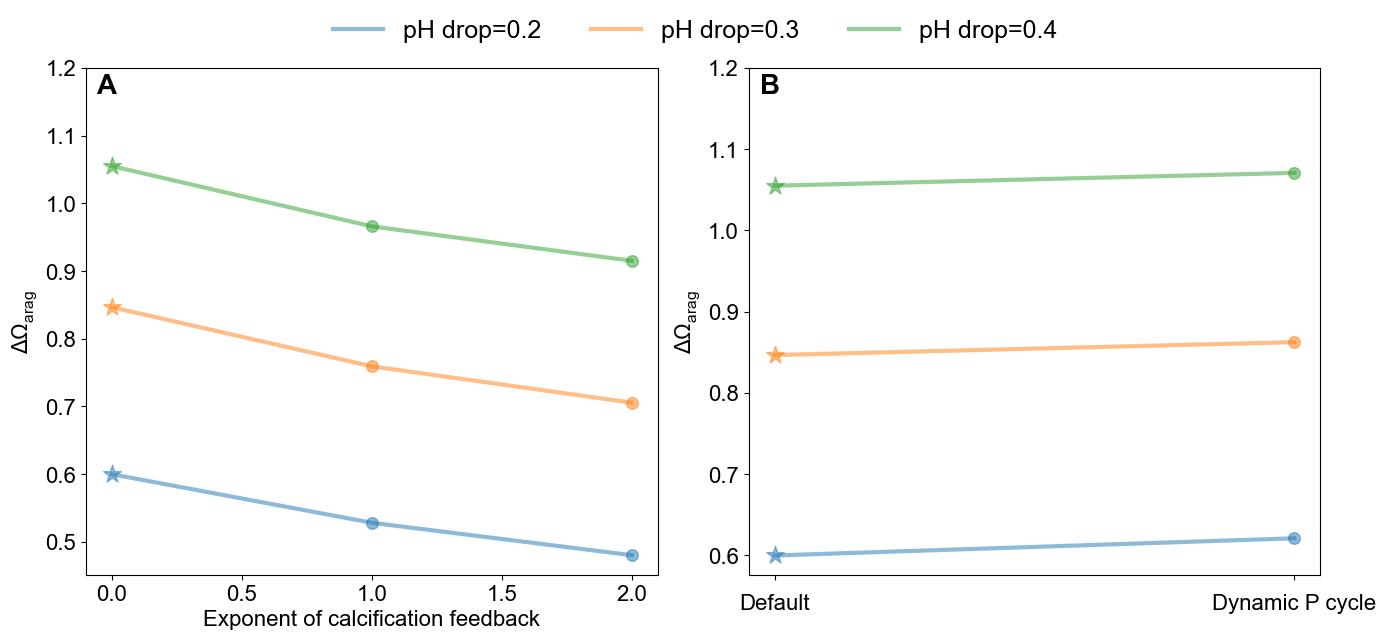

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load datasets ===
df_exp_rrain = pd.read_csv("sens_exp_rrain_results.csv")
df_pcycle = pd.read_csv("sens_pcycle_results.csv")

# === Compute ΔΩ (init - final) ===
df_exp_rrain["delta_omega"] = df_exp_rrain["init_omegaarg"] - df_exp_rrain["final_omegaarg"]
df_pcycle["delta_omega"] = df_pcycle["init_omegaarg"] - df_pcycle["final_omegaarg"]

# === Custom color theme ===
custom_colors = {
    0.2: '#1f77b4',  # 0.2
    0.3: '#ff7f0e',  # 0.3
    0.4: '#2ca02c'   # 0.4
}

# === Global style settings ===
alpha = 0.5
dot_size = 70
star_size = 180
line_width = 3
font_size = 16
subplot_labels = ['A', 'B']

# === Create figure ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flatten()

# === (a) exp_rrain sensitivity (ΔΩ) ===
for ph in sorted(df_exp_rrain["ph_drop"].unique()):
    subset = df_exp_rrain[df_exp_rrain["ph_drop"] == ph]
    color = custom_colors.get(ph, 'gray')

    # Line for ΔΩ
    axes[0].plot(subset["exp_rrain"], subset["delta_omega"],
                 color=color, linewidth=line_width, alpha=alpha, label=f"pH drop={ph}")

    # Dots (except where star)
    for i, row in subset.iterrows():
        if row["exp_rrain"] != 0:
            axes[0].scatter(row["exp_rrain"], row["delta_omega"],
                            s=dot_size, color=color, alpha=alpha)

    # Star
    star_point = subset[subset["exp_rrain"] == 0]
    if not star_point.empty:
        axes[0].scatter(star_point["exp_rrain"], star_point["delta_omega"],
                        marker='*', s=star_size, color=color, alpha=alpha, zorder=5)

axes[0].set_xlabel("Exponent of calcification feedback", fontsize=font_size)
axes[0].set_ylabel(r"$\Delta \Omega_{arag}$", fontsize=font_size)
axes[0].tick_params(axis='both', labelsize=font_size)
axes[0].text(0.02, 0.95, subplot_labels[0], transform=axes[0].transAxes,
             fontsize=font_size+4, fontweight='bold')

# === (b) pcycle sensitivity (ΔΩ) ===
for ph in sorted(df_pcycle["ph_drop"].unique()):
    subset = df_pcycle[df_pcycle["ph_drop"] == ph]
    color = custom_colors.get(ph, 'gray')

    # Line for ΔΩ
    axes[1].plot(subset["pcycle"], subset["delta_omega"],
                 color=color, linewidth=line_width, alpha=alpha)

    # Dots (except where star)
    for i, row in subset.iterrows():
        if row["pcycle"] != 0:
            axes[1].scatter(row["pcycle"], row["delta_omega"],
                            s=dot_size, color=color, alpha=alpha)

    # Star
    star_point = subset[subset["pcycle"] == 0]
    if not star_point.empty:
        axes[1].scatter(star_point["pcycle"], star_point["delta_omega"],
                        marker='*', s=star_size, color=color, alpha=alpha, zorder=5)

axes[1].set_ylabel(r"$\Delta \Omega_{arag}$", fontsize=font_size)
axes[1].set_xticks([0, 2])
axes[1].set_xticklabels(["Default", "Dynamic P cycle"], fontsize=font_size)
axes[1].tick_params(axis='x', pad=10)
axes[1].tick_params(axis='both', labelsize=font_size)
axes[1].yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
axes[1].text(0.02, 0.95, subplot_labels[1], transform=axes[1].transAxes,
             fontsize=font_size+4, fontweight='bold')

# === Omega_0 annotation ===
# axes[0].text(0, 1.85, r'$\Omega_0 = 2.35$', fontsize=16, color='white')

# === Set consistent y-axis range ===
axes[0].set_ylim(None, 1.2)
axes[1].set_ylim(None, 1.2)

# === Legend ===
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='upper center', fontsize=font_size+2, ncol=3,
           frameon=False, bbox_to_anchor=(0.5, 1.08))

# === Final layout ===
plt.tight_layout()
plt.savefig("Fig_exp_rrain_pcycle_deltaOmega.png", dpi=600, bbox_inches='tight')
plt.show()

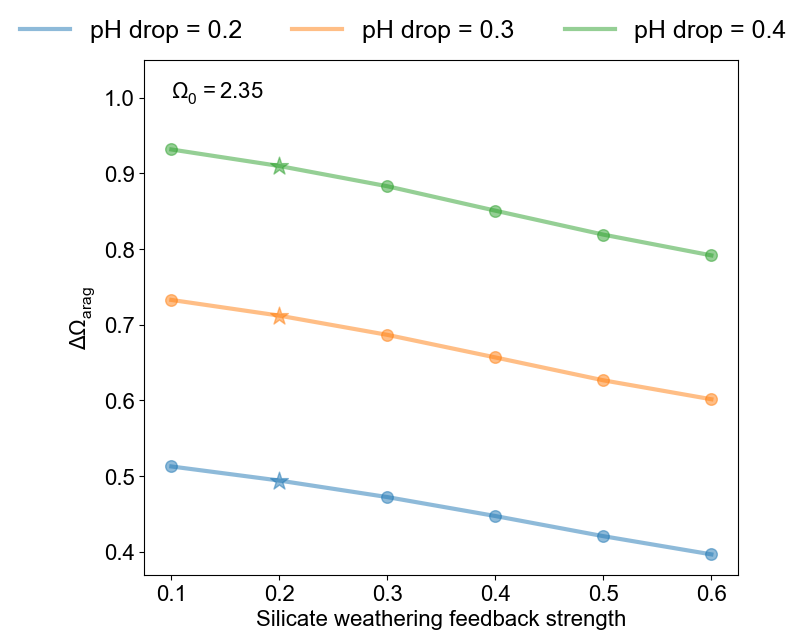

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load dataset ===
df_nsi = pd.read_csv("sens_nsi_results_20kyr.csv")

# === Compute ΔΩ (init - final) ===
df_nsi["delta_omega"] = df_nsi["init_omegaarg"] - df_nsi["final_omegaarg"]

# === Custom color theme ===
custom_colors = {
    0.2: '#1f77b4',  # blue
    0.3: '#ff7f0e',  # orange
    0.4: '#2ca02c'   # green
}

# === Global style settings ===
alpha = 0.5
dot_size = 70
star_size = 180
line_width = 3
font_size = 16

# === Create figure ===
fig, ax = plt.subplots(figsize=(7, 6))

# === Plotting ===
for ph in sorted(df_nsi["ph_drop"].unique()):
    subset = df_nsi[df_nsi["ph_drop"] == ph]
    color = custom_colors.get(ph, 'gray')

    # Line for ΔΩ
    ax.plot(subset["nsi"], subset["delta_omega"],
            color=color, linewidth=line_width, alpha=alpha, label=f"pH drop = {ph}")

    # Dots (except where star)
    for i, row in subset.iterrows():
        if row["nsi"] != 0.2:
            ax.scatter(row["nsi"], row["delta_omega"],
                       s=dot_size, color=color, alpha=alpha)

    # Star marker at nsi = 0.2
    star_point = subset[subset["nsi"] == 0.2]
    if not star_point.empty:
        ax.scatter(star_point["nsi"], star_point["delta_omega"],
                   marker='*', s=star_size, color=color, alpha=alpha, zorder=5)

# === Axis formatting ===
ax.set_xlabel("Silicate weathering feedback strength", fontsize=font_size)
ax.set_ylabel(r"$\Delta \Omega_{arag}$", fontsize=font_size)
ax.tick_params(axis='both', labelsize=font_size)
ax.set_ylim(None, 1.05)

# === Annotation ===
ax.text(0.1, 1.0, r'$\Omega_0 = 2.35$', fontsize=16, color='black')

# === Legend ===
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='upper center', fontsize=font_size+2, ncol=3,
           frameon=False, bbox_to_anchor=(0.5, 1.08))

# === Final layout ===
plt.tight_layout()
plt.savefig("Fig_nsi_sensitivity_deltaOmega.png", dpi=600, bbox_inches='tight')
plt.show()